# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [2]:
# student 1:Hen 8590
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [71]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [73]:
#Load

In [113]:

# Load datasets
train_data = pd.read_csv('wine_train.csv')
test_data = pd.read_csv('wine_test.csv')

# Separate features (X) and target (y)
X_train = train_data.iloc[:, :-1]  # All columns except the last one are features
y_train = train_data.iloc[:, -1]   # Last column is the target

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Check for duplicated rows
print("Number of duplicated rows in training data: ", train_data.duplicated().sum())
print("Number of duplicated rows in test data: ", test_data.duplicated().sum())

# Drop duplicates if necessary
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

# Check for missing data
print("Missing values in training data:\n", train_data.isnull().sum())

print("\nMissing values in test data:\n", test_data.isnull().sum())



Number of duplicated rows in training data:  0
Number of duplicated rows in test data:  0
Missing values in training data:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Missing values in test data:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue             

In [ ]:
# Print 5 first rows from each dataset

In [115]:
print("\nFirst 5 rows of train data:")
train_data.head()


First 5 rows of train data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [117]:
print("\nFirst 5 rows of test data:")
test_data.head()


First 5 rows of test data:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [9]:
#EDA

In [119]:
# Data statistics
train_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


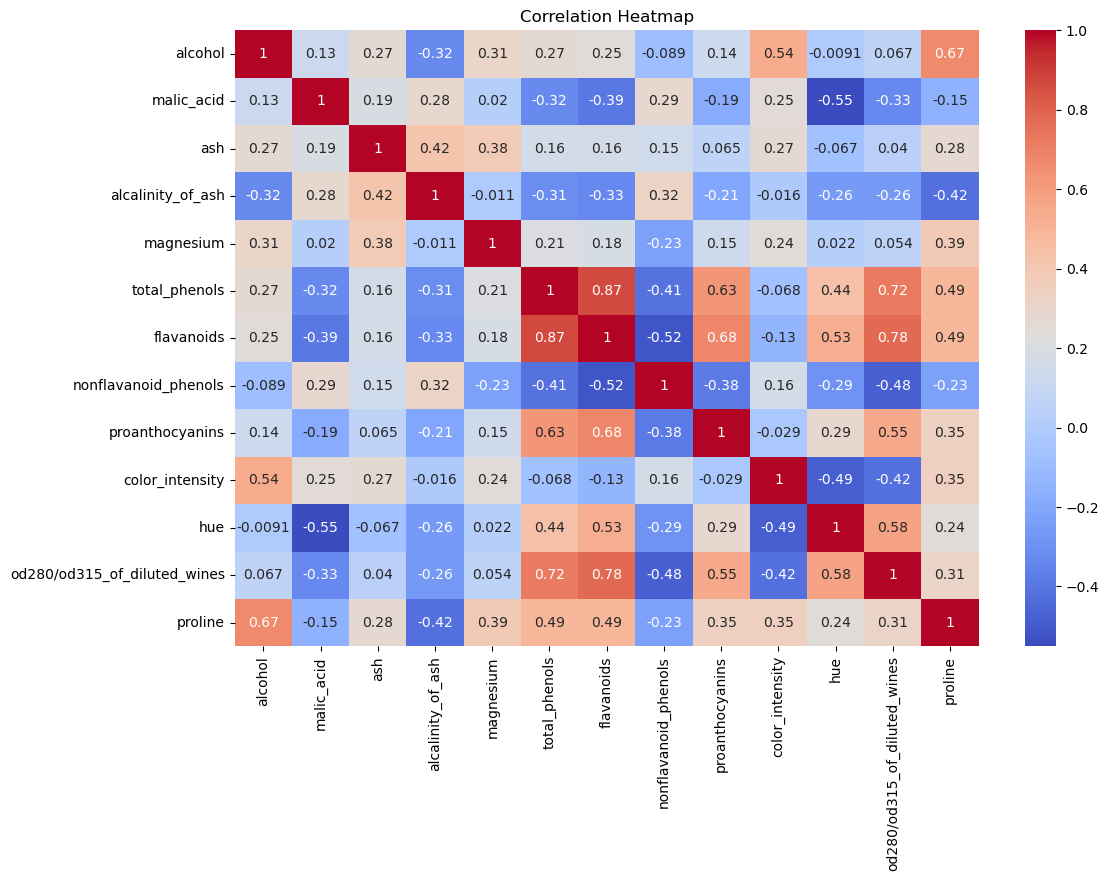

In [123]:
# Heatmap of correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


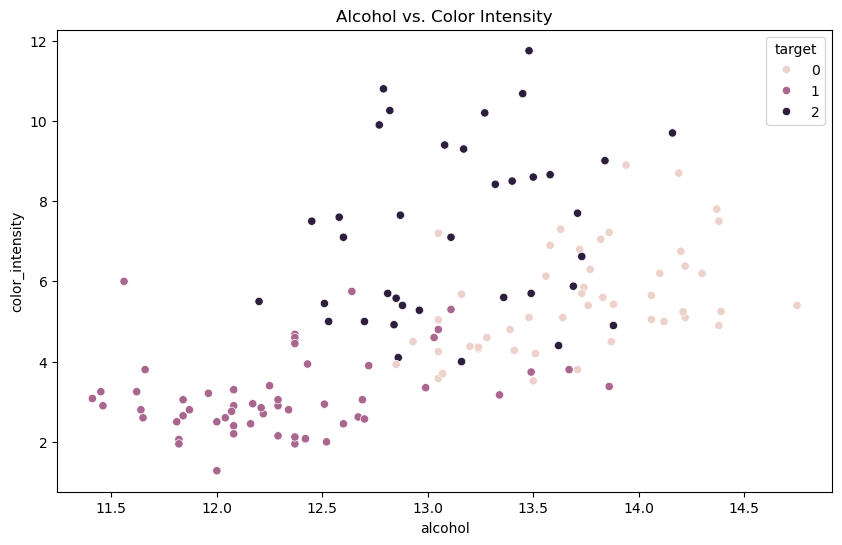

In [125]:
# Scatter plot between Alcohol and Color intensity with the target column
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='color_intensity', hue=y_train, data=X_train)
plt.title('Alcohol vs. Color Intensity')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [132]:
# Feature Engineering - Using PCA for dimensionality reduction
pca = PCA(n_components=10)
scaler = StandardScaler()

# Creating pipelines for models
pipelines = {
    'RandomForest': Pipeline([
        ('scaler', scaler),
        ('pca', pca),
        ('model', RandomForestClassifier())
    ]),
    'SVC': Pipeline([
        ('scaler', scaler),
        ('pca', pca),
        ('model', SVC())
    ]),
    'KNN': Pipeline([
        ('scaler', scaler),
        ('pca', pca),
        ('model', KNeighborsClassifier())
    ])
}

# Hyperparameter grids
params = {
    'RandomForest': {
        'model__n_estimators': [50, 100],
        'model__max_depth': [10, 20, 30],
        'model__min_samples_split': [2, 5]
    },
    'SVC': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance']
    }
}

# Using F1-macro as the evaluation metric
scoring = make_scorer(f1_score, average='macro')

# Initialize results container
best_models = []
cv_results_list = []

# Loop through models and perform Grid Search with Cross Validation
for name, pipeline in pipelines.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(pipeline, param_grid=params[name], cv=5, scoring=scoring)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_}")
    
    # Store the best models and cross-validation results
    best_models.append((name, grid_search.best_estimator_, grid_search.best_score_))



Tuning RandomForest...
Best parameters for RandomForest: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best cross-validation score for RandomForest: 0.9655002405002404

Tuning SVC...
Best parameters for SVC: {'model__C': 0.1, 'model__kernel': 'linear'}
Best cross-validation score for SVC: 0.9787114845938376

Tuning KNN...
Best parameters for KNN: {'model__n_neighbors': 5, 'model__weights': 'distance'}
Best cross-validation score for KNN: 0.9650439825052828


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [133]:
# Final Model Training on best model
best_model = max(best_models, key=lambda item: item[2])[1]
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', SVC(C=0.1, kernel='linear'))])

## Part 5 - Apply on test and show model performance estimation


Confusion Matrix:
[[11  0  0]
 [ 0 13  1]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        11
     class_1       1.00      0.93      0.96        14
     class_2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Accuracy: 0.9722


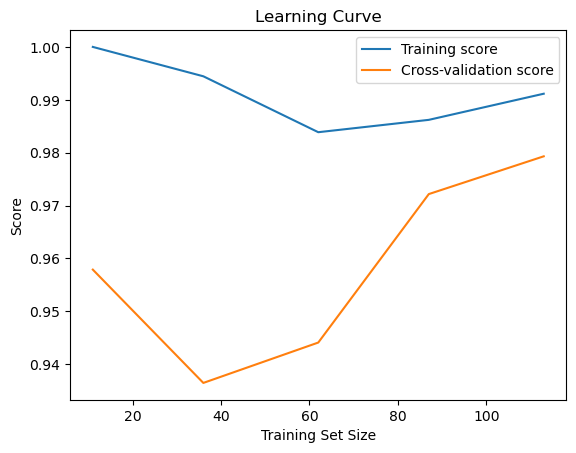

In [136]:
# Predict on the test data
y_pred = best_model.predict(X_test)

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['class_0', 'class_1', 'class_2']))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Plot learning curve for the best performing model
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.plot(train_sizes, test_mean, label="Cross-validation score")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend()
    plt.title("Learning Curve")
    plt.show()

# Plot the learning curve for the best model
plot_learning_curve(best_model, X_train, y_train)